In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [3]:
tsla = yf.download("TSLA", start="2023-04-01", end="2024-04-01")
tsla.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-04-03,194.770004,202.690002,192.199997,199.910004,169545900
2023-04-04,192.580002,198.740005,190.320007,197.320007,126463800
2023-04-05,185.520004,190.679993,183.759995,190.520004,133882500
2023-04-06,185.059998,186.389999,179.740005,183.080002,123857900
2023-04-10,184.509995,185.100006,176.110001,179.940002,142154600


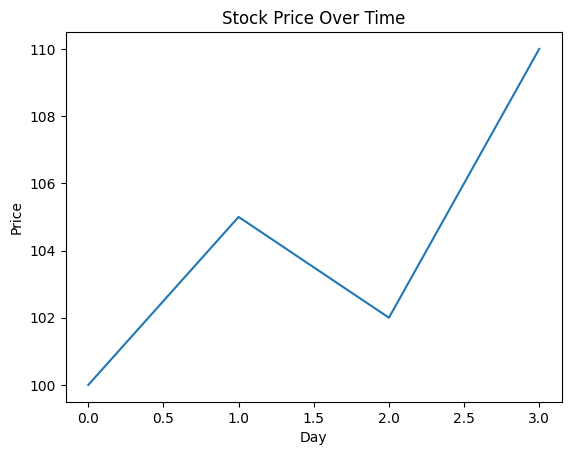

In [4]:
prices = [100, 105, 102, 110]
plt.plot(prices)
plt.title("Stock Price Over Time")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

In [5]:
# Add a new column to label volatility
tsla["Volatility"] = (tsla["High"] - tsla["Low"]) / tsla["Open"]
tsla["High_Volatility"] = tsla["Volatility"] > 0.05

# Preview result
tsla[["Open", "High", "Low", "Volatility", "High_Volatility"]].head(10)

Price,Open,High,Low,Volatility,High_Volatility
Ticker,TSLA,TSLA,TSLA,,
Date,,,,,
2023-04-03,199.910004,202.690002,192.199997,0.052474,True
2023-04-04,197.320007,198.740005,190.320007,0.042672,False
2023-04-05,190.520004,190.679993,183.759995,0.036322,False
2023-04-06,183.080002,186.389999,179.740005,0.036323,False
2023-04-10,179.940002,185.100006,176.110001,0.049961,False
2023-04-11,186.690002,189.190002,185.649994,0.018962,False
2023-04-12,190.740005,191.580002,180.309998,0.059086,True
2023-04-13,182.960007,186.500000,180.940002,0.030389,False


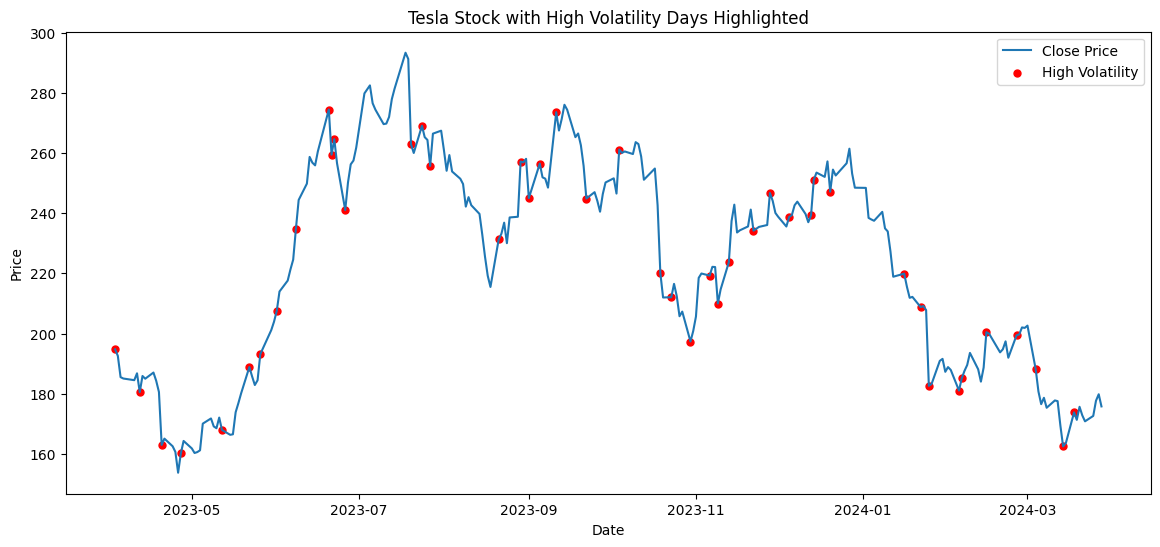

In [6]:
import matplotlib.pyplot as plt

# Plot closing price
plt.figure(figsize=(14,6))
plt.plot(tsla.index, tsla["Close"], label="Close Price")

# Highlight high volatility days
high_vol_days = tsla[tsla["High_Volatility"] == True]
plt.scatter(high_vol_days.index, high_vol_days["Close"], color="red", label="High Volatility", s=25)

plt.title("Tesla Stock with High Volatility Days Highlighted")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [7]:
# Feature 1: Previous day's volatility
tsla["Prev_Volatility"] = tsla["Volatility"].shift(1)

# Feature 2: Rolling average volume (last 3 days)
tsla["Avg_Volume_3D"] = tsla["Volume"].rolling(window=3).mean()

# Feature 3: Rolling std dev of Close price (last 3 days)
tsla["Std_Close_3D"] = tsla["Close"].rolling(window=3).std()

# Feature 4: Momentum (Close today vs 3 days ago)
tsla["Momentum_3D"] = tsla["Close"] - tsla["Close"].shift(3)

# Drop any rows with missing values
tsla.dropna(inplace=True)

# Preview features
tsla[["Prev_Volatility", "Avg_Volume_3D", "Std_Close_3D", "Momentum_3D", "High_Volatility"]].head()

Price,Prev_Volatility,Avg_Volume_3D,Std_Close_3D,Momentum_3D,High_Volatility
Ticker,,,,,
Date,,,,,
2023-04-06,0.036322,1.280681e+08,4.215164,-9.710007,False
2023-04-10,0.036323,1.332983e+08,0.505673,-8.070007,False
2023-04-11,0.049961,1.272611e+08,1.189803,1.269989,False
2023-04-12,0.018962,1.360606e+08,3.162852,-4.520004,True
2023-04-13,0.059086,1.263201e+08,3.380932,1.389999,False


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define features (X) and target (y)
features = ["Prev_Volatility", "Avg_Volume_3D", "Std_Close_3D", "Momentum_3D"]
X = tsla[features]
y = tsla["High_Volatility"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[41  0]
 [ 9  0]]

Classification Report:
               precision    recall  f1-score   support

       False       0.82      1.00      0.90        41
        True       0.00      0.00      0.00         9

    accuracy                           0.82        50
   macro avg       0.41      0.50      0.45        50
weighted avg       0.67      0.82      0.74        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# Re-train with class weighting to handle imbalance
model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
model_balanced.fit(X_train, y_train)

# Predict again
y_pred_balanced = model_balanced.predict(X_test)

# Evaluate again
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))

Confusion Matrix:
 [[14 27]
 [ 3  6]]

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.34      0.48        41
        True       0.18      0.67      0.29         9

    accuracy                           0.40        50
   macro avg       0.50      0.50      0.38        50
weighted avg       0.71      0.40      0.45        50



In [10]:
tsla["MA_7"] = tsla["Close"].rolling(window=7).mean()


In [11]:
tsla["Daily_Return"] = tsla["Close"].pct_change()


In [12]:
tsla["Range_Pct"] = (tsla["High"] - tsla["Low"]) / tsla["Close"]


In [13]:
tsla["Rolling_Volatility_7D"] = tsla["Daily_Return"].rolling(window=7).std()


In [14]:
# Add more features
tsla["MA_7"] = tsla["Close"].rolling(window=7).mean()
tsla["Daily_Return"] = tsla["Close"].pct_change()
tsla["Range_Pct"] = (tsla["High"] - tsla["Low"]) / tsla["Close"]
tsla["Rolling_Volatility_7D"] = tsla["Daily_Return"].rolling(window=7).std()

# Clean up any new NaN values from rolling calculations
tsla.dropna(inplace=True)

# Preview
tsla[["MA_7", "Daily_Return", "Range_Pct", "Rolling_Volatility_7D"]].head()


Price,MA_7,Daily_Return,Range_Pct,Rolling_Volatility_7D
Ticker,,,,
Date,,,,


In [15]:
# Update feature list to include new ones
features = [
    "Prev_Volatility",
    "Avg_Volume_3D",
    "Std_Close_3D",
    "Momentum_3D",
    "MA_7",
    "Daily_Return",
    "Range_Pct",
    "Rolling_Volatility_7D"
]

X = tsla[features]
y = tsla["High_Volatility"]

# Re-split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Re-train balanced logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
model_balanced.fit(X_train, y_train)

# Predict + evaluate
y_pred = model_balanced.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [16]:
print("Total rows:", len(tsla))
print("Columns with missing values:\n", tsla.isna().sum())
tsla.tail()


Total rows: 0
Columns with missing values:
 Price                  Ticker
Close                  TSLA      0
High                   TSLA      0
Low                    TSLA      0
Open                   TSLA      0
Volume                 TSLA      0
Volatility                       0
High_Volatility                  0
Prev_Volatility                  0
Avg_Volume_3D                    0
Std_Close_3D                     0
Momentum_3D                      0
MA_7                             0
Daily_Return                     0
Range_Pct                        0
Rolling_Volatility_7D            0
dtype: int64


Price,Close,High,Low,Open,Volume,Volatility,High_Volatility,Prev_Volatility,Avg_Volume_3D,Std_Close_3D,Momentum_3D,MA_7,Daily_Return,Range_Pct,Rolling_Volatility_7D
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,,,,,,
Date,,,,,,,,,,,,,,,


In [17]:
# Download Tesla data and flatten columns if needed
import yfinance as yf
import pandas as pd

tsla = yf.download("TSLA", start="2023-04-01", end="2024-04-01", group_by="ticker")

# Flatten multi-level columns (sometimes appears after download)
if isinstance(tsla.columns, pd.MultiIndex):
    tsla.columns = tsla.columns.get_level_values(0)

# Preview to make sure it looks right
tsla.head()


[*********************100%***********************]  1 of 1 completed


Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-04-03,199.910004,202.690002,192.199997,194.770004,169545900
2023-04-04,197.320007,198.740005,190.320007,192.580002,126463800
2023-04-05,190.520004,190.679993,183.759995,185.520004,133882500
2023-04-06,183.080002,186.389999,179.740005,185.059998,123857900
2023-04-10,179.940002,185.100006,176.110001,184.509995,142154600


In [18]:
# Create volatility label
tsla["Volatility"] = (tsla["High"] - tsla["Low"]) / tsla["Open"]
tsla["High_Volatility"] = tsla["Volatility"] > 0.05

# Build features
tsla["Prev_Volatility"] = tsla["Volatility"].shift(1)
tsla["Avg_Volume_3D"] = tsla["Volume"].rolling(window=3).mean()
tsla["Std_Close_3D"] = tsla["Close"].rolling(window=3).std()
tsla["Momentum_3D"] = tsla["Close"] - tsla["Close"].shift(3)
tsla["MA_7"] = tsla["Close"].rolling(window=7).mean()
tsla["Daily_Return"] = tsla["Close"].pct_change()
tsla["Range_Pct"] = (tsla["High"] - tsla["Low"]) / tsla["Close"]
tsla["Rolling_Volatility_7D"] = tsla["Daily_Return"].rolling(window=7).std()

# Clean up
tsla.dropna(inplace=True)

# Confirm
print("Final row count:", len(tsla))
tsla.head()


KeyError: 'High'

In [19]:
print("Column names:\n")
print(tsla.columns.tolist())


Column names:

['TSLA', 'TSLA', 'TSLA', 'TSLA', 'TSLA']


In [20]:
# Re-download and flatten properly
tsla = yf.download("TSLA", start="2023-04-01", end="2024-04-01", group_by="ticker")

# Fix multi-level columns if present
if isinstance(tsla.columns, pd.MultiIndex):
    tsla.columns = tsla.columns.get_level_values(1)  # Use the sub-header: 'Open', 'High', etc.

# Confirm fix
print("Column names:\n", tsla.columns.tolist())
tsla.head()


[*********************100%***********************]  1 of 1 completed

Column names:
 ['Open', 'High', 'Low', 'Close', 'Volume']


Price,Open,High,Low,Close,Volume
Date,,,,,
2023-04-03,199.910004,202.690002,192.199997,194.770004,169545900
2023-04-04,197.320007,198.740005,190.320007,192.580002,126463800
2023-04-05,190.520004,190.679993,183.759995,185.520004,133882500
2023-04-06,183.080002,186.389999,179.740005,185.059998,123857900
2023-04-10,179.940002,185.100006,176.110001,184.509995,142154600


In [21]:
# Create volatility label
tsla["Volatility"] = (tsla["High"] - tsla["Low"]) / tsla["Open"]
tsla["High_Volatility"] = tsla["Volatility"] > 0.05

# Build technical indicators as features
tsla["Prev_Volatility"] = tsla["Volatility"].shift(1)
tsla["Avg_Volume_3D"] = tsla["Volume"].rolling(window=3).mean()
tsla["Std_Close_3D"] = tsla["Close"].rolling(window=3).std()
tsla["Momentum_3D"] = tsla["Close"] - tsla["Close"].shift(3)
tsla["MA_7"] = tsla["Close"].rolling(window=7).mean()
tsla["Daily_Return"] = tsla["Close"].pct_change()
tsla["Range_Pct"] = (tsla["High"] - tsla["Low"]) / tsla["Close"]
tsla["Rolling_Volatility_7D"] = tsla["Daily_Return"].rolling(window=7).std()

# Drop NaNs
tsla.dropna(inplace=True)

# Confirm
print("Final row count:", len(tsla))
tsla.head()


Final row count: 242


Price,Open,High,Low,Close,Volume,Volatility,High_Volatility,Prev_Volatility,Avg_Volume_3D,Std_Close_3D,Momentum_3D,MA_7,Daily_Return,Range_Pct,Rolling_Volatility_7D
Date,,,,,,,,,,,,,,,
2023-04-13,182.960007,186.500000,180.940002,185.899994,112933000,0.030389,False,0.059086,1.263201e+08,3.380932,1.389999,185.842854,0.029689,0.029909,0.023639
2023-04-14,183.949997,186.279999,182.009995,185.000000,96438700,0.023213,False,0.030389,1.198760e+08,2.870286,-1.789993,184.759997,-0.004841,0.023081,0.023544
2023-04-17,186.320007,189.690002,182.690002,187.039993,116662200,0.037570,False,0.023213,1.086780e+08,1.022347,6.500000,184.977138,0.011027,0.037425,0.019584
2023-04-18,187.149994,187.690002,183.580002,184.309998,92067000,0.021961,False,0.037570,1.017226e+08,1.419539,-1.589996,184.869995,-0.014596,0.022299,0.020492
2023-04-19,179.100006,183.500000,177.649994,180.589996,125732700,0.032663,False,0.021961,1.114873e+08,3.237637,-4.410004,184.309995,-0.020183,0.032394,0.021840


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Use all engineered features
features = [
    "Prev_Volatility",
    "Avg_Volume_3D",
    "Std_Close_3D",
    "Momentum_3D",
    "MA_7",
    "Daily_Return",
    "Range_Pct",
    "Rolling_Volatility_7D"
]

X = tsla[features]
y = tsla["High_Volatility"]

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model with class balancing
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[25 15]
 [ 4  5]]

Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.62      0.72        40
        True       0.25      0.56      0.34         9

    accuracy                           0.61        49
   macro avg       0.56      0.59      0.53        49
weighted avg       0.75      0.61      0.65        49



In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with same features
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Confusion Matrix:
 [[40  0]
 [ 1  8]]

Classification Report:
               precision    recall  f1-score   support

       False       0.98      1.00      0.99        40
        True       1.00      0.89      0.94         9

    accuracy                           0.98        49
   macro avg       0.99      0.94      0.96        49
weighted avg       0.98      0.98      0.98        49

